
# <center> CS  4783/5783
# <center> Fall 2022
# <center> Assignment 2 – Neural Networks 
# <center> Due: 10/07/2022 11:59 pm
# <center> Submitted By: Haridas Das

# Code Compile

Click Runtime --> Restart Runtime

This will clear out all variables from memory and let you start over.

# Problem 1
Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural
network with backpropagation for regression using the Mean Square Error loss. Assume that you
are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different
from the update rule for the network trained for binary classification using log loss.

# Slution of Problem 1

The Mean Square Error loss function 

$L= \frac{1}{2N} \sum_{i=1}^N (\hat{y}-y)^2$, where $\hat{y}$ and $y$ are the predicted and observed values respectively. 

Also hidden layer activation function $g(z)=\frac{1}{1+e^{-z}}$, where $g'(z)=g(z)(1-g(z))$. 

Moreover, the  activation function $g(z)=z$ for the output layer. 

$Z_1=W_1x+b_1$, where $a_1=g(Z_1)$ and $Z_2=W_2 a_1+b_2$, where $a_2=g(Z_2)=\hat{y}$. 

Now $\frac{\partial L}{\partial W_2}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial W_2}
=\frac{2}{2N} \sum_{i=1}^N (\hat{y}-y) \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial w_2}=\frac{1}{N}\sum_{i=1}^N (\hat{y}-y).1. a_1=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y).a_1^T$, since $\frac{\partial \hat{y}}{\partial z_2} =\frac{\partial g{z_2}}{\partial z_2}=1$ and $\frac{\partial z_2}{\partial w_2}=a_1$.   

Thus $\frac{\partial L}{\partial W_2}=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y).a_1^T$. By ignoring the sum, we basically have $\frac{\partial L}{\partial W_2}= (\hat{y}-y).a_1^T$. 

Now $\frac{\partial L}{\partial W_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y) .1. W_2. a_1(1-a_1).x=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y) W_2 a_1(1-a_1)x^T$. 

Hence $\frac{\partial L}{\partial W_1}=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y) W_2 a_1(1-a_1)x^T$. 

Again by ignoring the sum we have $\frac{\partial L}{\partial W_1}= (\hat{y}-y) W_2 a_1(1-a_1)x^T$.


Similarly, $\frac{\partial L}{\partial b_2}=(\hat{y}-y) \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial b_2}=(\hat{y}-y) .1. 1= (\hat{y}-y)$, 

and 

$\frac{\partial L}{\partial b_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial b_1}= (\hat{y}-y) .1. W_2. a_1(1-a_1).x=(\hat{y}-y) W_2 a_1(1-a_1)$. 


Finally, update the weights and bias by the following:

$W_i=W_i -\alpha \frac{\partial L}{\partial W_i}$ and $b_i=b_i -\alpha \frac{\partial L}{\partial b_i}$

where $i$ refers to the $i$th layer. We will repeat until convergence. 

# Binary Classification using log loss

We will see that it has exactly the same updated expression. 

We know 
$L=-[(1-y) log(1-\hat{y})+ylog (\hat{y})]$.  

We use the activation function $g(z)=\frac{1}{1+e^{-z}}$, where $g'(z)=g(z)(1-g(z))$ for hidden layer and output layer. 

Also, 
$Z_1=W_1x+b_1$, where $a_1=g(Z_1)$ and $Z_2=W_2 a_1+b_2$, where $a_2=g(Z_2)=\hat{y}$. 


Now $\frac{\partial L}{\partial W_2}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial W_2}
=-[\frac{(1-y)}{(1-\hat{y})} \frac{\partial (1-a_2)}{\partial a_2}  + \frac{y}{\hat{y}} \frac{\partial a_2}{\partial a_2} ] g'(Z_2) a_1= -[\frac{(1-y)}{(1-\hat{y})} (-1)  + \frac{y}{\hat{y}} (1)] g(Z_2)(1-g(Z_2)) a_1=-[-\frac{(1-y)}{(1-\hat{y})}  + \frac{y}{\hat{y}}] a_2(1-a_2) a_1=[\frac{(\hat{y}-y)}{\hat{y}(1-\hat{y})}] \hat{y}(1-\hat{y}) a_1=(\hat{y}-y).a_1^T$. 


Now $\frac{\partial L}{\partial W_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}= -[ -\frac{(1-y)}{(1-\hat{y})}(-1) + \frac{y}{\hat{y}}] g'(Z_2) W_2 g'(Z_1) x=  \frac{(\hat{y}-y)}{\hat{y}(1-\hat{y})} \hat{y} (1-\hat{y}) W_2 a_1(1-a_1).x^T= (\hat{y}-y) W_2 a_1(1-a_1).x^T$ 


Similarly, $\frac{\partial L}{\partial b_2}=(\hat{y}-y)$ and $\frac{\partial L}{\partial b_1}=(\hat{y}-y) W_2 a_1(1-a_1)$. 

Finally, update the weights and bias by the following:

$W_i=W_i -\alpha \frac{\partial L}{\partial W_i}$ and $b_i=b_i -\alpha \frac{\partial L}{\partial b_i}$

where $i$ refers to the $i$th layer. We will repeat until convergence. 

# Conclusion: 

We have derived the update rule and showed how to train a 2-layer (one hidden layer and one output layer) neural network with backpropagation for regression using the Mean Square Error loss and log loss. We used the Sigmoid activation function for the hidden layer and the output layer in the log loss function. On the contrary, we used the Sigmoid activation function for the hidden layer and the linear activation function for the output layer in the Mean Square Error loss function. Finally, we found that the Mean Square Error loss function and the log loss function's updated rules are the same. 

# Problem 2
For the given data on canvas, construct a neural network for the regression task. Your network
must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the
hidden layer(s). You can choose the number of neurons in each layer using your intuition.
The data is already split to have your input data for training (X_train.csv) and testing
(X_train.csv) and their corresponding target values Y_train.csv and Y_test.csv,
respectively. You can load the data as follows:
X_train = np.loadtxt("X_train.csv")
Implement the backpropagation algorithm and train your network until convergence.

Answer the following questions:

1. What is the activation function that you will choose for the output layer? Justify your answer
briefly.
2. How many neurons should there be in the output layer? Why?
3. Report the average MSE loss and the accuracy.
4. Plot the loss and accuracy as a function of the number of iterations.
5. What is the effect of the learning rate on the training process? Vary the learning rate to be
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
6. What is the effect of the number of neurons in the hidden layer? To answer this question,
you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule
need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.
7. What is the effect of the activation functions in the network? Explore two different activation
functions other than sigmoid such as tanh, linear, or ReLU.

a. Will you need to change the update rule?

b. What is the change that you need to make to achieve this experiment?

c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.


# Solution of Problem 2:

In [188]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import random
import math 

In [189]:
# Load Drive and mount
from google.colab import drive 
#load mounting drive to access the files on the google MyDrive. 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
# Upload the training and test data as they are already split and given in Question 2.
#X_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment2/X_train.csv') # training data
# I like the following array
X_train=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment2/X_train.csv') 
Y_train=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment2/Y_train.csv')
X_test=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment2/X_test.csv')
Y_test=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment2/Y_test.csv')

In [191]:
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))
X_train[:,0]

(100, 2)
(100,)
(50, 2)
(50,)


array([-0.25189695, -0.39108897,  0.38603031,  0.75412143, -1.70608593,
        1.00405615, -0.39115663,  0.14702677, -0.46875629, -0.80284317,
       -0.1253808 , -1.08047146, -0.53247053, -2.05256292,  2.70684984,
        0.64180551, -0.54725989,  0.18712452,  0.7207876 ,  1.13370299,
       -0.8548599 , -0.44587278, -1.13664459, -0.982776  ,  0.90282586,
        0.17800909,  2.15484644,  0.68120929,  0.16178119,  2.60596728,
        0.86416488,  0.66631932,  0.33086562, -0.92860227, -0.97139257,
       -0.85519604, -0.27951021,  0.23812696, -1.30648231,  2.02954418,
       -0.28525677,  0.21423419, -0.75532534,  0.05366146, -1.3829201 ,
        0.34353919,  0.16690464, -1.09769302,  0.67753511, -0.13484072,
        0.80770591, -1.38537856,  0.55876941, -0.03443164, -0.17405654,
       -0.92587426, -0.84807698,  0.40758645,  0.90796945,  0.39346076,
       -0.29843574,  0.6610292 , -2.73646445, -0.550876  , -1.23561426,
       -0.93323722, -0.72946634, -0.21988155,  0.30266545,  0.72

In [192]:
print('Minimum value in the Y_train',np.min(Y_train))
print('Maximum value in the Y_train',np.max(Y_train))
print('Minimum value in the Y_test',np.min(Y_test))
print('Maximum value in the Y_test',np.max(Y_test))

Minimum value in the Y_train -147.078116997524
Maximum value in the Y_train 160.16900121190633
Minimum value in the Y_test -178.6745345156375
Maximum value in the Y_test 173.4091233043346


# Data frame information
The training data has 100 examples or observation for training the model with 2 features. To test the model we have 50 examples. 

# Modeling
We construct neural network (NN) for the regression. In the construction of NN, we use 1 hidden layer and 1 output layer. In addition, we use the sigmoid to be our activation function for the hidden layer. 


# Answer 2(1)  
To build the neural network model, we first want what activation function works for the output layer. As we have seen, the training and test data target variables are continuous. We, therefore, want to use the linear function $g(x)=ax+b$ as an activation function for the output layer, where $a=1$ and the bias term $b=0$. 

# Answer 2(2)  
Because the target values are continuous, the output layer should contain one neuron.

# Code Development

In [193]:
# Define a loss function 
def loss_fun_mse(x,y,m,b):
  y_predicted = model(a,m,b)
  mse=(1/(2))* np.mean((y_predicted-y)**2)
  return mse

# data examples =n
1. Suppose $X$ has $f$ features with examples $n$, so the input size $[n \times f]$
2. $Y$ be the output (target ) values $[n \times 1]$
3. Suppose $h_1$ is the number of neurons in layer 1 and  $Z_1}$ is the input of layer $1$.  
3. At layer 1: Weight $W_1$ matrix sizs is number of neurons $\times$ feature $f$ , i.e. , $h_1 \times f$,  so the output $Z_1=W_1 \times x+b_1$, where $b_1$ is bias with the size, $h_1 \times 1$, and $a_1=g(Z_1)$ with the size $h_1 \times 1$.
4. Suppose the number of neurons in the output layer is $h_o$. As the output layer $Z_2=W_2 \times a_1+b_2$, so the size of the weight $W_2$ euals to $h_o \times h_1$, where $h_1$ number of neurons in the previous layer, or the input size of $a_2=g(Z_2)$ (number of neurons $\times$ 1.) 




In [194]:
num_iters=5
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)
print(iter_list)

[0, 1, 2, 3, 4]


# Initial Code

Alternative option: Average MSE on training data 1013.6618026065149
Average MSE on training data 1013.6618026065152


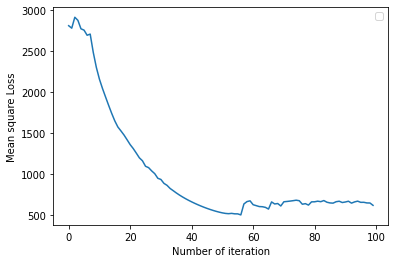

In [288]:
from matplotlib import legend
##final revised  

#creating neural networks for two layers 

#Setting the hyperparameters 
N=X_train.shape[0]
h_1 = 3 # layer1_neurons
learning_rate = 0.001
num_iters = 100
h_o = 1              # output_layer_neurons

f = X_train.shape[1] # number of feature in the traing and test data

# make the iteration into a list
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)

# Randomly initialize weight w1,w2 and bias terms b1, b2
w1 = np.random.rand(h_1,f)
b1 = np.random.rand(h_1,1)
w2 = np.random.rand(h_o,h_1) 
b2 = np.random.rand(h_o,1)

# Define the training set and test set 
x=X_train
y=Y_train

# Define the empty set to strore the many updates 

mse_list = []
avg_mse_list = []
mse_list_alt = []
accuracy_list = []
avg_mse_list = []
truep_list = []
truenp_list = []


# Record weight and bias values 
w1_list = []
w2_list = []
b1_list= []
b2_list = []

#Working for the generalization for the neural networks
f=x.shape[1]

# Define the sigmoid function for the hidden layer
def sigmoid_fun(z):
  g1=1/(1+np.exp(-z))
  return g1

# Define the activation function for the output layer 
def linear_fun(z,a,b):
  g2=a*z+b
  return g2

for i in range(x.shape[0]):
  y_pred = []
  mse_j_collect = []
  #avg_mse_list = []
  #truep_list = []
  #truenp_list = []
  #accuracy_list = []
  for j in range(x.shape[0]):
    z1 = np.dot(w1,x[j].reshape(f,1))+b1
    a1 = sigmoid_fun(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = linear_fun(z2,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    # want to store this predicted score in the y_pred
    y_pred.append(a2)


    # calculate the accuaracy
    #if y[j]== a2 or np.round(a2,0):
     # truep_list.append(1)
    #else:
     # truenp_list.append(1)
       
    #y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten() is also useful
    #Using Backprop update the weights and bias terms 
    # Backward pass
    dL_dw = (a2-y[j])
  
    # update weights
    w2 = w2-(learning_rate)*dL_dw*a1.T  # check the matrix 
    w1 = w1-(learning_rate)*dL_dw*np.dot(w2,a1)*np.dot(1-a1,x[1].reshape(2,1).T)
    b2 = b2-(learning_rate)*dL_dw  # check the matrix 
    b1 = b1-(learning_rate)*dL_dw*w2.T*np.dot(a1.T,1-a1)

    # mse calculate
    mse_j_ind=(a2-y[j])**2
    mse_j_collect.append(mse_j_ind)


  d=sum(mse_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_list_alt.append(d)
  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  # update the y_pred in each epoch 
  y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten()
  mse_ = np.sum((y_pred-y)**2)/(2*x.shape[0])
  mse_list.append(mse_)
  #accuary_ind_list=len(truep_list)/100
  #accuracy_list.append(accuary_ind_list)
avg_mse_list_alt=np.sum(mse_list_alt)/x.shape[0]
print('Alternative option: Average MSE on training data',avg_mse_list_alt)
avg_mse_list=np.sum(mse_list)/x.shape[0]
print('Average MSE on training data',avg_mse_list) # Both ways give us the same average MSE on training data
plt.plot(iter_list, mse_list)
plt.xlabel('Number of iteration')
plt.ylabel('Mean square Loss')
plt.legend()




# Problem 2(3)  and Problem 2(4) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in exp


Alternative option: Average MSE on training data 814.5700194090489
Average MSE on training data 814.5700194090487


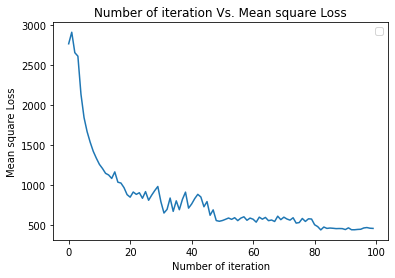

Least MSE on training data is 434.9092964255389 at index 82
Average MSE on training data in the new prediction 5.230041038724463
Initial Prediction: [-64.3023313   98.45788626  98.8169921  -64.210184   -64.19958219
  53.67252867 104.72643291 -64.23029538  92.4451753  -29.33465781
 -64.22138894  93.66120439  93.40093617  23.28676624   1.81842171
 -64.19309448  26.8189988  -64.18410799 -64.1708665   23.34875319
 111.67811169  90.68708973  23.13452402  93.48151675 -64.18314933
 -64.15626835 -64.13569238  86.78282628  56.6633275   23.35139049
 -64.10276504 -64.14711155 -64.12033014 111.82948421 -64.12269933
 111.86608581 100.91485685 111.14239362 -64.16858174 -64.21810214
 111.73908954 -63.51974057 -55.63041207 -64.1145503  109.66527672
  23.55625031  23.49951293 -64.22475511 -33.84433561  23.74339018
 -26.75796943 -64.22228086  94.36559642  86.10072163  90.79904784
  93.38292725  82.47905214  67.88745595  22.92062335 -64.34390685
  22.92486394 -64.34936005 -64.30127717  74.35873126 -64.32

In [289]:
from matplotlib import legend
##final revised  

#creating neural networks for two layers 

#Setting the hyperparameters 
N=X_train.shape[0]
h_1 = 10 # layer1_neurons
learning_rate = 0.001
num_iters = 100
h_o = 1              # output_layer_neurons
f = X_train.shape[1] # number of feature in the traing and test data

# make the iteration into a list
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)

# Randomly initialize weight w1,w2 and bias terms b1, b2
w1 = np.random.rand(h_1,f)
b1 = np.random.rand(h_1,1)
w2 = np.random.rand(h_o,h_1) 
b2 = np.random.rand(h_o,1)

# Define the training set and test set 
x=X_train
y=Y_train

# Define the empty set to strore the many updates 

mse_list = []
avg_mse_list = []
mse_list_alt = []
accuracy_list = []
avg_mse_list = []
truep_list = []
truenp_list = []


# Record weight and bias values 
w1_list = []
w2_list = []
b1_list= []
b2_list = []
a2_new_list = []
#Working for the generalization for the neural networks
f=x.shape[1]

# Define the sigmoid function for the hidden layer
def sigmoid_fun(z):
  g1=1/(1+np.exp(-z))
  return g1

# Define the activation function for the output layer 
def linear_fun(z,a,b):
  g2=a*z+b
  return g2

for i in range(x.shape[0]):
  y_pred = []
  mse_j_collect = []
  #avg_mse_list = []
  #truep_list = []
  #truenp_list = []
  #accuracy_list = []
  for j in range(x.shape[0]):
    z1 = np.dot(w1,x[j].reshape(f,1))+b1
    a1 = sigmoid_fun(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = linear_fun(z2,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    # want to store this predicted score in the y_pred
    y_pred.append(a2)


    # calculate the accuaracy
    #if y[j]== a2 or np.round(a2,0):
     # truep_list.append(1)
    #else:
     # truenp_list.append(1)
       
    #y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten() is also useful
    #Using Backprop update the weights and bias terms 
    # Backward pass
    dL_dw = (a2-y[j])
  
    # update weights
    w2 = w2-(learning_rate)*dL_dw*a1.T  # check the matrix 
    w1 = w1-(learning_rate)*dL_dw*np.dot(w2,a1)*np.dot(1-a1,x[1].reshape(2,1).T)
    b2 = b2-(learning_rate)*dL_dw  # check the matrix 
    b1 = b1-(learning_rate)*dL_dw*w2.T*np.dot(a1.T,1-a1)

    # mse calculate
    mse_j_ind=(a2-y[j])**2
    mse_j_collect.append(mse_j_ind)


  d=sum(mse_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_list_alt.append(d)
  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  # update the y_pred in each epoch 
  y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten()
  mse_ = np.sum((y_pred-y)**2)/(2*x.shape[0])
  mse_list.append(mse_)
  #accuary_ind_list=len(truep_list)/100
  #accuracy_list.append(accuary_ind_list)


# avg mse calculation using the training data
avg_mse_list_alt=np.sum(mse_list_alt)/x.shape[0]
print('Alternative option: Average MSE on training data',avg_mse_list_alt)
avg_mse_list=np.sum(mse_list)/x.shape[0]
print('Average MSE on training data',avg_mse_list) # Both ways give us the same average MSE on training data
plt.plot(iter_list, mse_list)
plt.xlabel('Number of iteration')
plt.ylabel('Mean square Loss')
plt.title('Number of iteration Vs. Mean square Loss')
plt.legend()
plt.show()


# using the test data we will calculate the errorn on the 

# To do this, we choose the weights that do well on your training set and can generalize well. 
## This usually is the weights producing the least MSE on training data. Ref: Dr. Sathya
#For future reference, this is the default for any and all ML algorithms. 
## We should always pick the model with the best training accuracy and error. Ref: Dr. Sathya
#First, we will see how find the best weights that gives least MSE and best accuracy on training data fir the model predictors
# Perhaps, we don't compute the accuracy so we only consider least MSE

minimum = mse_list[0]
index = 0
for i in range(len(mse_list)):
  if mse_list[i] < minimum:
    minimum = mse_list[i]
    index= i
print('Least MSE on training data is', minimum,'at index',index) 


# Fwd Pass with new weights
y_pred_train_new = []
mse_train_new_list =[]
mse_train_new_ind = []
a2_train_new_list = []
mse_new_j_collect = []
mse_new_list_alt = []
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (100):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_new_list.append(a2_new)
  y_pred_train_new.append(a2)
  
# mse calculate
  mse_new_j_ind=(a2_new-y[j])**2
  mse_new_j_collect.append(mse_new_j_ind)


d=sum(mse_new_j_collect)/(2*x.shape[0]) # mean square error in each iteration
mse_new_list_alt.append(d)

# avg mse calculation using the training data
avg_mse_new_list_alt=np.sum(mse_new_list_alt)/x.shape[0]
print('Average MSE on training data in the new prediction',avg_mse_new_list_alt)
#plt.plot(iter_list, mse_new_j_collect)
#plt.xlabel('Number of iteration')
#plt.ylabel('Mean square Loss')
#plt.title('Number of iteration Vs. Mean square Loss')
#plt.legend()
#plt.show()



#print("Initial Prediction", y_pred, "New Prediction:", a2_new_list, "Actual:", y)
#print("Initial Prediction",        "New Prediction:",       "Actual:")
#print( y_pred, a2_new_list, y)

print("Initial Prediction:", y_pred)
print("New Prediction:",a2_new_list)
print("Actual:",y)

# alternative way to print not perfect for the moment
#for a,b,c in zip(y_pred[::100],a2_new_list[1::100],y[2::100]):
  #print '{:<30}{:<30}{:<}'.format(a,b,c)



# Analysis on the Test data 
#X_test
#Y_test
mse_test_list =[]
mse_list_ind = []
a2_test_list = []
# Fwd Pass with new weights
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (X_test.shape[0]):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_test_list.append(a2_new)
  mse_j_test=(a2-y[j])**2
  mse_list_ind.append(mse_j_test)

dd=sum(mse_list_ind)/(2*X_test.shape[0]) # mean square error in each iteration
mse_test_list.append(dd)
avg_mse_test_list=np.sum(mse_test_list)/X_test.shape[0]
print('Average MSE on test data',avg_mse_test_list) 

# Problem 2(3)

Average MSE on training data 814.5700194090487

Average MSE on test data 123.3725740396072.

# Problem 2(4) : 
We plot the MSE loss function vs. the number of iterations. The figure and the results show that initially, the loss is high, but after several iterations, the loss becomes low and constant for both datasets. Moreover, average MSE on test data give us the low average MSE on test data compare to traing data.
In this experiment, I used ten neurons in the hidden layer and one neuron in the output layer, and the learning rate=0.001 also used backpropagation 100 times. 

# Problem 2(5):

In [286]:
learningRateList=[0.001,0.003,0.01,0.03,0.1,0.3,1.0]
#Setting the hyperparameters 
N=X_train.shape[0]
h_1 = 10 # layer1_neurons
learning_rate = 0.001
num_iters = 100
h_o = 1              # output_layer_neurons
f = X_train.shape[1] # number of feature in the traing and test data

# make the iteration into a list
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)

# Randomly initialize weight w1,w2 and bias terms b1, b2
w1 = np.random.rand(h_1,f)
b1 = np.random.rand(h_1,1)
w2 = np.random.rand(h_o,h_1) 
b2 = np.random.rand(h_o,1)

# Define the training set and test set 
x=X_train
y=Y_train

# Define the empty set to strore the many updates 

mse_list = []
avg_mse_list = []
mse_list_alt = []
accuracy_list = []
avg_mse_list = []
truep_list = []
truenp_list = []


# Record weight and bias values 
w1_list = []
w2_list = []
b1_list= []
b2_list = []
a2_new_list = []
#Working for the generalization for the neural networks
f=x.shape[1]

# Define the sigmoid function for the hidden layer
def sigmoid_fun(z):
  g1=1/(1+np.exp(-z))
  return g1

# Define the activation function for the output layer 
def linear_fun(z,a,b):
  g2=a*z+b
  return g2


for k in range(len(learningRateList)):
  learning_rate=learningRateList[k]
  for i in range(x.shape[0]):
    y_pred = []
    mse_j_collect = []
    #avg_mse_list = []
    #truep_list = []
    #truenp_list = []
    #accuracy_list = []
    for j in range(x.shape[0]):
      z1 = np.dot(w1,x[j].reshape(f,1))+b1
      a1 = sigmoid_fun(z1)
      z2 = np.dot(w2,a1)+b2
      a2 = linear_fun(z2,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
      # want to store this predicted score in the y_pred
      y_pred.append(a2)


      # calculate the accuaracy
      #if y[j]== a2 or np.round(a2,0):
      # truep_list.append(1)
      #else:
      # truenp_list.append(1)
       
      #y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten() is also useful
      #Using Backprop update the weights and bias terms 
      # Backward pass
      dL_dw = (a2-y[j])
  
      # update weights
      w2 = w2-(learning_rate)*dL_dw*a1.T  # check the matrix 
      w1 = w1-(learning_rate)*dL_dw*np.dot(w2,a1)*np.dot(1-a1,x[1].reshape(2,1).T)
      b2 = b2-(learning_rate)*dL_dw  # check the matrix 
      b1 = b1-(learning_rate)*dL_dw*w2.T*np.dot(a1.T,1-a1)

      # mse calculate
      mse_j_ind=(a2-y[j])**2
      mse_j_collect.append(mse_j_ind)

  d=sum(mse_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_list_alt.append(d)
  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

    # update the y_pred in each epoch 
  y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten()
  mse_ = np.sum((y_pred-y)**2)/(2*x.shape[0])
  mse_list.append(mse_)
  #accuary_ind_list=len(truep_list)/100
  #accuracy_list.append(accuary_ind_list)


   # avg mse calculation using the training data
   #avg_mse_list_alt=np.sum(mse_list_alt)/x.shape[0]
   #print('Alternative option: Average MSE on training data',avg_mse_list_alt)
   #avg_mse_list=np.sum(mse_list)/x.shape[0]
   #print('Average MSE on training data',avg_mse_list) # Both ways give us the same average MSE on training data
   #plt.plot(iter_list, mse_list)
   #plt.xlabel('Number of iteration')
   #plt.ylabel('Mean square Loss')
   #plt.title('Number of iteration Vs. Mean square Loss')
   #plt.legend()
   #plt.show()


# using the test data we will calculate the errorn on the 

# To do this, we choose the weights that do well on your training set and can generalize well. 
## This usually is the weights producing the least MSE on training data. Ref: Dr. Sathya
#For future reference, this is the default for any and all ML algorithms. 
## We should always pick the model with the best training accuracy and error. Ref: Dr. Sathya
#First, we will see how find the best weights that gives least MSE and best accuracy on training data fir the model predictors
# Perhaps, we don't compute the accuracy so we only consider least MSE

  minimum = mse_list[0]
  index = 0
  for i in range(len(mse_list)):
   if mse_list[i] < minimum:
     minimum = mse_list[i]
     index= i
  print('Least MSE on training data is', minimum,'at index',index) 


  # Fwd Pass with new weights
  y_pred_train_new = []
  mse_train_new_list =[]
  mse_train_new_ind = []
  a2_train_new_list = []
  mse_new_j_collect = []
  mse_new_list_alt = []
  w1_new=w1_list[index]
  w2_new=w2_list[index]
  b1_new=b1_list[index]
  b2_new=b2_list[index]
  for j in range (100):
    z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
    a1_new = sigmoid_fun(z1_new)
    z2_new= np.dot(w2_new,a1_new)+b2_new
    a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    a2_new_list.append(a2_new)
    y_pred_train_new.append(a2)
  
    # mse calculate
  mse_new_j_ind=(a2_new-y[j])**2
  mse_new_j_collect.append(mse_new_j_ind)


  d=sum(mse_new_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_new_list_alt.append(d)

  # avg mse calculation using the training data
  avg_mse_new_list_alt=np.sum(mse_new_list_alt)/x.shape[0]
  print('Average MSE on training data in the new prediction',avg_mse_new_list_alt)
  #plt.plot(iter_list, mse_new_j_collect)
  #plt.xlabel('Number of iteration')
  #plt.ylabel('Mean square Loss')
  #plt.title('Number of iteration Vs. Mean square Loss')
  #plt.legend()
  #plt.show()
  print("Initial Prediction:", y_pred)
  print("New Prediction:",a2_new_list)
  print("Actual:",y)

  # Analysis on the Test data 
  #X_test
  #Y_test
  mse_test_list =[]
  mse_list_ind = []
  a2_test_list = []
  # Fwd Pass with new weights
  w1_new=w1_list[index]
  w2_new=w2_list[index]
  b1_new=b1_list[index]
  b2_new=b2_list[index]
  for j in range (X_test.shape[0]):
    z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
    a1_new = sigmoid_fun(z1_new)
    z2_new= np.dot(w2_new,a1_new)+b2_new
    a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    a2_test_list.append(a2_new)
    mse_j_test=(a2-y[j])**2
    mse_list_ind.append(mse_j_test)

  dd=sum(mse_list_ind)/(2*X_test.shape[0]) # mean square error in each iteration
  mse_test_list.append(dd)
  avg_mse_test_list=np.sum(mse_test_list)/X_test.shape[0]
  print('Average MSE on test data',avg_mse_test_list) 

epoch = 100
num_epoch = np.arange(epoch)
plt.plot(num_epoch, np.array(mse_test_list[0:100]).reshape(epoch,1), color = 'red')
plt.plot(num_epoch, np.array(mse_test_list[100:200]).reshape(epoch,1), color = 'green')
plt.plot(num_epoch, np.array(mse_test_list[200:300]).reshape(epoch,1), color = 'blue')
plt.plot(num_epoch, np.array(mse_test_list[300:400]).reshape(epoch,1), color = 'black')
plt.plot(num_epoch, np.array(mse_test_list[400:500]).reshape(epoch,1), color = 'yellow')
plt.plot(num_epoch, np.array(mse_test_list[500:600]).reshape(epoch,1), color = 'orange')
plt.plot(num_epoch, np.array(mse_test_list[600:700]).reshape(epoch,1), color = 'purple')
plt.legend(("0.001 learning", "0.003 learning", "0.01 learning", "0.03 learning", "0.1 learning","0.3 learning", "1.0 learning"))
plt.ylabel('RMSE')
plt.xlabel('Number of Iteration')
plt.title('RMSE Vs Iteration for different learning rate ')
plt.show()

Least MSE on training data is 897.0076637739661 at index 0
Average MSE on training data in the new prediction 0.040336735401811506
Initial Prediction: [-31.94945936 121.70042731 143.67949267 -31.96586673 -31.9986923
  68.31066584  68.33835646 -32.09057164  68.35848811 -32.10880986
 -32.07870545  68.26238973 143.49990485 -32.14718568 -32.12259436
 -31.961198   -32.02379097 -31.89072713 -31.92717661 -32.0404615
 121.68940604  68.42540791 -31.95721367 143.61607934 -31.87634549
 -31.88474169 -31.91298725  68.37185956  68.39794529 -31.95116938
 -31.78373018 -31.93688094 -31.94495513 121.43154055 -32.02602801
 110.45296553  68.05697868 121.27107083 -32.12617556 -32.2997909
 143.31716026 -32.37452716 -32.34034509 -32.31430279 120.99015257
 -32.59120901 -32.49939253 -32.39632459 -32.60821338 -32.53925193
 -32.42308024 -32.33581066  67.81186828  48.92670903  67.832713
 120.92083252  67.79881453  56.85369862 -32.52595555 -32.38886366
 -32.41009248 -32.34499832 -32.31194681  67.74202411 -32.39512

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


Least MSE on training data is 804.5641082152216 at index 1
Average MSE on training data in the new prediction 0.024971254779846498
Initial Prediction: [-38.16122867 105.31676633 134.72468027 -38.01796634 -38.10940545
  58.63715422  93.39191211 -38.41780508  58.51022608 -38.37872047
 -38.25643138  92.83437904 102.30223538 -38.33021912 -38.17550963
 -37.68304183  59.27904909 -37.98174673 -38.05985028 -38.34001661
  93.31644449  59.22901894 -37.85016873 135.41454181 -37.50840111
 -37.50679766 -37.54409317  59.56018496  59.82251868 -37.50894588
 -36.99732514 -37.42464203 -37.42391051 136.07166841 -37.74195418
 112.65552892  72.96945608 134.6750943  -38.15172593 -38.60575698
 134.46334339 -38.74227428 -38.60967551 -38.52347265 111.88612206
 -39.22669657 -38.91020382 -38.59936121 -39.16414784 -35.25990844
 -38.54534563 -38.28196726  58.49074972  58.76037557  58.53210077
 134.04890911  58.3461912   58.00335539 -38.75834808 -38.31648044
 -38.34845308 -38.10830745 -38.01544372  58.52290064 -38.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in square


Least MSE on training data is 605.0922948917084 at index 2
Average MSE on training data in the new prediction 0.0004390986902894386
Initial Prediction: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
New Prediction: [array([[-32.09266106]]), array([[121.60295793]]), array([[136.8458323]]), array([[-32.09403208]]), array([[-32.08406455]]), array([[68.37047457]]), array([[68.37327581]]), array([[-32.09433439]]), array([[68.37428306]]), array([[-32.09333155]]), array([[-32.09050937]]), array([[68.37535431]]), array([[143.73087531]]), array([[-32.09052273]]), array([[-32.10545436]]), array([[-32.09288066]]), array([[-32.09567523]]), arra

ValueError: ignored

# Conclusion 2.5 :

In this experiment, I used ten neurons in the hidden layer and one neuron in the output layer, and various learning rate=0.001 also used backpropagation 100 times. We see different losses in different learning rates. The result shows that lower learning rates give us better accuracy. 

# Pronlem 2.6 

Alternative option: Average MSE on training data 1303.7301340309966
Average MSE on training data 1303.7301340309964


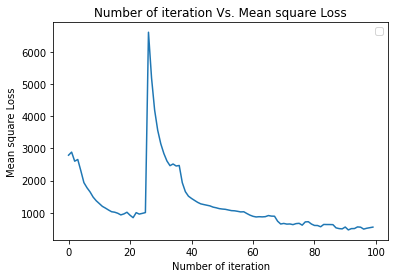

Least MSE on training data is 468.287736536344 at index 91
Average MSE on training data in the new prediction 7.206709677720289
Initial Prediction: [-52.20325394 114.45461128 119.15046355 -52.15878563 -52.16023528
  68.19586541  93.14437707 -52.20675615  80.53615708 -52.1958306
 -52.17440585  81.97181274  92.91914864  15.16300838 -51.48022331
 -52.08443336  25.40499741 -52.08612482 -52.08500046  17.43802459
 117.19609218  57.90623425  15.26955418  99.15445892 -52.07395719
 -52.05918416 -52.05074978  85.12105975  49.94405522 -10.46320236
 -51.9877146  -52.04417016 -52.02949768 119.11107566 -52.05123931
 119.00620854  99.11596947  97.88566381 -52.10127768 -52.16286538
 119.0254584  -52.1542482  -52.11516058 -52.09353589 119.30616958
   7.24444908  16.12599039 -52.20171729 -52.23775891  34.73901108
 -52.17138847 -52.17845484  99.38637864  79.00980223  80.46361869
  97.05876099  49.52492887  42.95022527  22.8354108  -52.25384411
 -39.5565971  -52.20378765 -52.17470059  96.29804527 -52.2221

In [295]:
from matplotlib import legend
##final revised  

#creating neural networks for two layers 

#Setting the hyperparameters 
N=X_train.shape[0]
h_1 = 10 # Number of neurons
learning_rate = 0.001
num_iters = 100
h_o = 1              # output_layer_neurons
f = X_train.shape[1] # number of feature in the traing and test data

# make the iteration into a list
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)

# Randomly initialize weight w1,w2 and bias terms b1, b2
w1 = np.random.rand(h_1,f)
b1 = np.random.rand(h_1,1)
w2 = np.random.rand(h_o,h_1) 
b2 = np.random.rand(h_o,1)

# Define the training set and test set 
x=X_train
y=Y_train

# Define the empty set to strore the many updates 

mse_list = []
avg_mse_list = []
mse_list_alt = []
accuracy_list = []
avg_mse_list = []
truep_list = []
truenp_list = []


# Record weight and bias values 
w1_list = []
w2_list = []
b1_list= []
b2_list = []
a2_new_list = []
#Working for the generalization for the neural networks
f=x.shape[1]

# Define the sigmoid function for the hidden layer
def sigmoid_fun(z):
  g1=1/(1+np.exp(-z))
  return g1

# Define the activation function for the output layer 
def linear_fun(z,a,b):
  g2=a*z+b
  return g2

for i in range(x.shape[0]):
  y_pred = []
  mse_j_collect = []
  #avg_mse_list = []
  #truep_list = []
  #truenp_list = []
  #accuracy_list = []
  for j in range(x.shape[0]):
    z1 = np.dot(w1,x[j].reshape(f,1))+b1
    a1 = sigmoid_fun(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = linear_fun(z2,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    # want to store this predicted score in the y_pred
    y_pred.append(a2)


    # calculate the accuaracy
    #if y[j]== a2 or np.round(a2,0):
     # truep_list.append(1)
    #else:
     # truenp_list.append(1)
       
    #y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten() is also useful
    #Using Backprop update the weights and bias terms 
    # Backward pass
    dL_dw = (a2-y[j])
  
    # update weights
    w2 = w2-(learning_rate)*dL_dw*a1.T  # check the matrix 
    w1 = w1-(learning_rate)*dL_dw*np.dot(w2,a1)*np.dot(1-a1,x[1].reshape(2,1).T)
    b2 = b2-(learning_rate)*dL_dw  # check the matrix 
    b1 = b1-(learning_rate)*dL_dw*w2.T*np.dot(a1.T,1-a1)

    # mse calculate
    mse_j_ind=(a2-y[j])**2
    mse_j_collect.append(mse_j_ind)


  d=sum(mse_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_list_alt.append(d)
  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  # update the y_pred in each epoch 
  y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten()
  mse_ = np.sum((y_pred-y)**2)/(2*x.shape[0])
  mse_list.append(mse_)
  #accuary_ind_list=len(truep_list)/100
  #accuracy_list.append(accuary_ind_list)


# avg mse calculation using the training data
avg_mse_list_alt=np.sum(mse_list_alt)/x.shape[0]
print('Alternative option: Average MSE on training data',avg_mse_list_alt)
avg_mse_list=np.sum(mse_list)/x.shape[0]
print('Average MSE on training data',avg_mse_list) # Both ways give us the same average MSE on training data
plt.plot(iter_list, mse_list)
plt.xlabel('Number of iteration')
plt.ylabel('Mean square Loss')
plt.title('Number of iteration Vs. Mean square Loss')
plt.legend()
plt.show()


# using the test data we will calculate the errorn on the 

# To do this, we choose the weights that do well on your training set and can generalize well. 
## This usually is the weights producing the least MSE on training data. Ref: Dr. Sathya
#For future reference, this is the default for any and all ML algorithms. 
## We should always pick the model with the best training accuracy and error. Ref: Dr. Sathya
#First, we will see how find the best weights that gives least MSE and best accuracy on training data fir the model predictors
# Perhaps, we don't compute the accuracy so we only consider least MSE

minimum = mse_list[0]
index = 0
for i in range(len(mse_list)):
  if mse_list[i] < minimum:
    minimum = mse_list[i]
    index= i
print('Least MSE on training data is', minimum,'at index',index) 


# Fwd Pass with new weights
y_pred_train_new = []
mse_train_new_list =[]
mse_train_new_ind = []
a2_train_new_list = []
mse_new_j_collect = []
mse_new_list_alt = []
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (100):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_new_list.append(a2_new)
  y_pred_train_new.append(a2)
  
# mse calculate
  mse_new_j_ind=(a2_new-y[j])**2
  mse_new_j_collect.append(mse_new_j_ind)


d=sum(mse_new_j_collect)/(2*x.shape[0]) # mean square error in each iteration
mse_new_list_alt.append(d)

# avg mse calculation using the training data
avg_mse_new_list_alt=np.sum(mse_new_list_alt)/x.shape[0]
print('Average MSE on training data in the new prediction',avg_mse_new_list_alt)
#plt.plot(iter_list, mse_new_j_collect)
#plt.xlabel('Number of iteration')
#plt.ylabel('Mean square Loss')
#plt.title('Number of iteration Vs. Mean square Loss')
#plt.legend()
#plt.show()



#print("Initial Prediction", y_pred, "New Prediction:", a2_new_list, "Actual:", y)
#print("Initial Prediction",        "New Prediction:",       "Actual:")
#print( y_pred, a2_new_list, y)

print("Initial Prediction:", y_pred)
print("New Prediction:",a2_new_list)
print("Actual:",y)

# alternative way to print not perfect for the moment
#for a,b,c in zip(y_pred[::100],a2_new_list[1::100],y[2::100]):
  #print '{:<30}{:<30}{:<}'.format(a,b,c)



# Analysis on the Test data 
#X_test
#Y_test
mse_test_list =[]
mse_list_ind = []
a2_test_list = []
# Fwd Pass with new weights
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (X_test.shape[0]):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_test_list.append(a2_new)
  mse_j_test=(a2-y[j])**2
  mse_list_ind.append(mse_j_test)

dd=sum(mse_list_ind)/(2*X_test.shape[0]) # mean square error in each iteration
mse_test_list.append(dd)
avg_mse_test_list=np.sum(mse_test_list)/X_test.shape[0]
print('Average MSE on test data',avg_mse_test_list) 

# Conclusion on 2.6: 
In this experiment, I used ten neurons in the hidden layer and one neuron in the output layer, and various learning rate=0.001 also used backpropagation 100 times. This experiment analyzes on different hidden layers that give us different losses. We summarize different losses in the following: 


1.   Number of neuron in hidden layer =1. Then Average MSE on training data 2801.8547788795295. Average MSE on training data in the new prediction 25.109119196208656.  Also Average MSE on test data 66.13005992069507. 

2.   The number of neurons in the hidden layer =3. Average MSE on training data 1106.633393268965; average MSE on training data in the new prediction 21.348947565986478; average MSE on test data 76.12035255535311.  

3. The number of neurons in the hidden layer =5. Average MSE on training data 991.015965651613; Least MSE on training data is 579.2943147455989 at index 97 Average MSE on training data in the new prediction 18.582364286983324. Average MSE on test data 117.51977948853776


4. The number of neurons in the hidden layer =7. Average MSE on training data 1446.2881800555863; Least MSE on training data is 636.3039525469499 at index 96 Average MSE on training data in the new prediction 11.720380661127644. Average MSE on test data 103.35053371245677.

5. The number of neurons in the hidden layer =9. Average MSE on training data 1397.698641608274; Least MSE on training data is 616.102760172193 at index 95 Average MSE on training data in the new prediction 6.174490863586255. Average MSE on test data 98.99195856404027.

6. The number of neurons in the hidden layer =10. Average MSE on training data 1303.7301340309966; Least MSE on training data is 468.287736536344 at index 91 Average MSE on training data in the new prediction 7.206709677720289. Average MSE on test data 106.67989184174861. 



The above experiment concludes that the losses decrease if we increase the neurons in the hidden layer. 

# Problem 2.7

# Problem 2(7) a,b and c: 

Using the hidden layer activation function $g(z)=z)$

he Mean Square Error loss function 

$L= \frac{1}{2N} \sum_{i=1}^N (\hat{y}-y)^2$, where $\hat{y}$ and $y$ are the predicted and observed values respectively. 

First consider the hidden layer activation function $g(z)=z$, where $g'(z)=1$. 

Moreover, the  activation function $g(z)=z$ for the output layer. 

$Z_1=W_1x+b_1$, where $a_1=g(Z_1)$ and $Z_2=W_2 a_1+b_2$, where $a_2=g(Z_2)=\hat{y}$. 

Now $\frac{\partial L}{\partial W_2}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial W_2}
=(\hat{y}-y) \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial w_2}=(\hat{y}-y).1. a_1=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y).a_1^T$, since $\frac{\partial \hat{y}}{\partial z_2} =\frac{\partial g{z_2}}{\partial z_2}=1$ and $\frac{\partial z_2}{\partial w_2}=a_1$.   
We then basically have $\frac{\partial L}{\partial W_2}= (\hat{y}-y).a_1^T$. 

Now $\frac{\partial L}{\partial W_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}=(\hat{y}-y) .1. W_2. (1).x= (\hat{y}-y) W_2 x^T$.   

Similarly, $\frac{\partial L}{\partial b_2}=(\hat{y}-y) \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial b_2}=(\hat{y}-y) .1. 1= (\hat{y}-y)$, 

and 

$\frac{\partial L}{\partial b_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial b_1}= (\hat{y}-y) .1. W_2.  (1).x=(\hat{y}-y) W_2$.


Finally, update the weights and bias by the following:

$W_i=W_i -\alpha \frac{\partial L}{\partial W_i}$ and $b_i=b_i -\alpha \frac{\partial L}{\partial b_i}$

where $i$ refers to the $i$th layer. We will repeat until convergence.  Yes, in this case we need to change the update rule. 


Yes, we will need to change the dimension of the update rule. 

We need to change the activation function and the dimesnsion in the update rules.  

In [ ]:
from matplotlib import legend
##final revised  

#creating neural networks for two layers 

#Setting the hyperparameters 
N=X_train.shape[0]
h_1 = 10 # Number of neurons
learning_rate = 0.001
num_iters = 100
h_o = 1              # output_layer_neurons
f = X_train.shape[1] # number of feature in the traing and test data

# make the iteration into a list
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)

# Randomly initialize weight w1,w2 and bias terms b1, b2
w1 = np.random.rand(h_1,f)
b1 = np.random.rand(h_1,1)
w2 = np.random.rand(h_o,h_1) 
b2 = np.random.rand(h_o,1)

# Define the training set and test set 
x=X_train
y=Y_train

# Define the empty set to strore the many updates 

mse_list = []
avg_mse_list = []
mse_list_alt = []
accuracy_list = []
avg_mse_list = []
truep_list = []
truenp_list = []


# Record weight and bias values 
w1_list = []
w2_list = []
b1_list= []
b2_list = []
a2_new_list = []
#Working for the generalization for the neural networks
f=x.shape[1]


# Define the activation function for the output layer 
def linear_fun(z,a,b):
  g2=a*z+b
  return g2

for i in range(x.shape[0]):
  y_pred = []
  mse_j_collect = []
  #avg_mse_list = []
  #truep_list = []
  #truenp_list = []
  #accuracy_list = []
  for j in range(x.shape[0]):
    z1 = np.dot(w1,x[j].reshape(f,1))+b1
    a1 = linear_fun(z1,1,0)
    z2 = np.dot(w2,a1)+b2
    a2 = linear_fun(z2,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    # want to store this predicted score in the y_pred
    y_pred.append(a2)


    # calculate the accuaracy
    #if y[j]== a2 or np.round(a2,0):
     # truep_list.append(1)
    #else:
     # truenp_list.append(1)
       
    #y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten() is also useful
    #Using Backprop update the weights and bias terms 
    # Backward pass
    dL_dw = (a2-y[j])
  
    # update weights
    w2 = w2-(learning_rate)*dL_dw*a1.T  # check the matrix 
    w1 = w1-(learning_rate)*dL_dw*np.dot(w2,x[1].reshape(2,1).T)
    b2 = b2-(learning_rate)*dL_dw  # check the matrix 
    b1 = b1-(learning_rate)*dL_dw*w2.T

    # mse calculate
    mse_j_ind=(a2-y[j])**2
    mse_j_collect.append(mse_j_ind)


  d=sum(mse_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_list_alt.append(d)
  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  # update the y_pred in each epoch 
  y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten()
  mse_ = np.sum((y_pred-y)**2)/(2*x.shape[0])
  mse_list.append(mse_)
  #accuary_ind_list=len(truep_list)/100
  #accuracy_list.append(accuary_ind_list)


# avg mse calculation using the training data
avg_mse_list_alt=np.sum(mse_list_alt)/x.shape[0]
print('Alternative option: Average MSE on training data',avg_mse_list_alt)
avg_mse_list=np.sum(mse_list)/x.shape[0]
print('Average MSE on training data',avg_mse_list) # Both ways give us the same average MSE on training data
plt.plot(iter_list, mse_list)
plt.xlabel('Number of iteration')
plt.ylabel('Mean square Loss')
plt.title('Number of iteration Vs. Mean square Loss')
plt.legend()
plt.show()


# using the test data we will calculate the errorn on the 

# To do this, we choose the weights that do well on your training set and can generalize well. 
## This usually is the weights producing the least MSE on training data. Ref: Dr. Sathya
#For future reference, this is the default for any and all ML algorithms. 
## We should always pick the model with the best training accuracy and error. Ref: Dr. Sathya
#First, we will see how find the best weights that gives least MSE and best accuracy on training data fir the model predictors
# Perhaps, we don't compute the accuracy so we only consider least MSE

minimum = mse_list[0]
index = 0
for i in range(len(mse_list)):
  if mse_list[i] < minimum:
    minimum = mse_list[i]
    index= i
print('Least MSE on training data is', minimum,'at index',index) 


# Fwd Pass with new weights
y_pred_train_new = []
mse_train_new_list =[]
mse_train_new_ind = []
a2_train_new_list = []
mse_new_j_collect = []
mse_new_list_alt = []
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (100):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_new_list.append(a2_new)
  y_pred_train_new.append(a2)
  
# mse calculate
  mse_new_j_ind=(a2_new-y[j])**2
  mse_new_j_collect.append(mse_new_j_ind)


d=sum(mse_new_j_collect)/(2*x.shape[0]) # mean square error in each iteration
mse_new_list_alt.append(d)

# avg mse calculation using the training data
avg_mse_new_list_alt=np.sum(mse_new_list_alt)/x.shape[0]
print('Average MSE on training data in the new prediction',avg_mse_new_list_alt)
#plt.plot(iter_list, mse_new_j_collect)
#plt.xlabel('Number of iteration')
#plt.ylabel('Mean square Loss')
#plt.title('Number of iteration Vs. Mean square Loss')
#plt.legend()
#plt.show()



#print("Initial Prediction", y_pred, "New Prediction:", a2_new_list, "Actual:", y)
#print("Initial Prediction",        "New Prediction:",       "Actual:")
#print( y_pred, a2_new_list, y)

print("Initial Prediction:", y_pred)
print("New Prediction:",a2_new_list)
print("Actual:",y)

# alternative way to print not perfect for the moment
#for a,b,c in zip(y_pred[::100],a2_new_list[1::100],y[2::100]):
  #print '{:<30}{:<30}{:<}'.format(a,b,c)



# Analysis on the Test data 
#X_test
#Y_test
mse_test_list =[]
mse_list_ind = []
a2_test_list = []
# Fwd Pass with new weights
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (X_test.shape[0]):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_test_list.append(a2_new)
  mse_j_test=(a2-y[j])**2
  mse_list_ind.append(mse_j_test)

dd=sum(mse_list_ind)/(2*X_test.shape[0]) # mean square error in each iteration
mse_test_list.append(dd)
avg_mse_test_list=np.sum(mse_test_list)/X_test.shape[0]
print('Average MSE on test data',avg_mse_test_list) 

# 2(7) : a, b, and c

Using the hidden layer activation function $g(z)=tanh(z)$

The Mean Square Error loss function 

$L= \frac{1}{2N} \sum_{i=1}^N (\hat{y}-y)^2$, where $\hat{y}$ and $y$ are the predicted and observed values respectively. 

First consider the hidden layer activation function $g(z)=tanh(z)=\frac{2}{1+e^{-2z}}-1$, where $g'(z)=(1-(g(z))^2)$. 

Moreover, the  activation function $g(z)=z$ for the output layer. 

$Z_1=W_1x+b_1$, where $a_1=g(Z_1)$ and $Z_2=W_2 a_1+b_2$, where $a_2=g(Z_2)=\hat{y}$. 

Now $\frac{\partial L}{\partial W_2}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial W_2}
=(\hat{y}-y) \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial w_2}=(\hat{y}-y).1. a_1=\frac{1}{N} \sum_{i=1}^N (\hat{y}-y).a_1^T$, since $\frac{\partial \hat{y}}{\partial z_2} =\frac{\partial g{z_2}}{\partial z_2}=1$ and $\frac{\partial z_2}{\partial w_2}=a_1$.   
We then basically have $\frac{\partial L}{\partial W_2}= (\hat{y}-y).a_1^T$. 

Now $\frac{\partial L}{\partial W_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}=(\hat{y}-y) .1. W_2. (1-(g(z))^2).x= (\hat{y}-y) W_2 (1-(g(z))^2)x^T$, 
where $g(z)=tanh(z)=\frac{2}{1+e^{-2z}}-1$.  

Similarly, $\frac{\partial L}{\partial b_2}=(\hat{y}-y) \frac{\partial \hat{y}}{\partial z_2} \frac{\partial z_2}{\partial b_2}=(\hat{y}-y) .1. 1= (\hat{y}-y)$, 

and 

$\frac{\partial L}{\partial b_1}=\frac{\partial L}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1}\frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial b_1}= (\hat{y}-y) .1. W_2.  (1-(g(z))^2).x=(\hat{y}-y) W_2 (1-(g(z))^2)$, where $g(z)=tanh(z)=\frac{2}{1+e^{-2z}}-1$.  


Finally, update the weights and bias by the following:

$W_i=W_i -\alpha \frac{\partial L}{\partial W_i}$ and $b_i=b_i -\alpha \frac{\partial L}{\partial b_i}$

where $i$ refers to the $i$th layer. We will repeat until convergence.  Yes, in this case we need to change the update rule. 

Yes, we will need to change the dimension of the update rule. 

We need to change the activation function and the dimesnsion in the update rules.  

In [ ]:
from matplotlib import legend
##final revised  

#creating neural networks for two layers 

#Setting the hyperparameters 
N=X_train.shape[0]
h_1 = 10 # Number of neurons
learning_rate = 0.001
num_iters = 100
h_o = 1              # output_layer_neurons
f = X_train.shape[1] # number of feature in the traing and test data

# make the iteration into a list
iter_list = [] 
for i in range(num_iters):
  iter_list.append(i)

# Randomly initialize weight w1,w2 and bias terms b1, b2
w1 = np.random.rand(h_1,f)
b1 = np.random.rand(h_1,1)
w2 = np.random.rand(h_o,h_1) 
b2 = np.random.rand(h_o,1)

# Define the training set and test set 
x=X_train
y=Y_train

# Define the empty set to strore the many updates 

mse_list = []
avg_mse_list = []
mse_list_alt = []
accuracy_list = []
avg_mse_list = []
truep_list = []
truenp_list = []


# Record weight and bias values 
w1_list = []
w2_list = []
b1_list= []
b2_list = []
a2_new_list = []
#Working for the generalization for the neural networks
f=x.shape[1]

# Define the sigmoid function for the hidden layer
def tanh_fun(z):
  g1=2/(1+np.exp(-2z)) -1
  return g1

# Define the activation function for the output layer 
def linear_fun(z,a,b):
  g2=a*z+b
  return g2

for i in range(x.shape[0]):
  y_pred = []
  mse_j_collect = []
  #avg_mse_list = []
  #truep_list = []
  #truenp_list = []
  #accuracy_list = []
  for j in range(x.shape[0]):
    z1 = np.dot(w1,x[j].reshape(f,1))+b1
    a1 = tanh_fun(z)(z1)
    z2 = np.dot(w2,a1)+b2
    a2 = linear_fun(z2,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
    # want to store this predicted score in the y_pred
    y_pred.append(a2)


    # calculate the accuaracy
    #if y[j]== a2 or np.round(a2,0):
     # truep_list.append(1)
    #else:
     # truenp_list.append(1)
       
    #y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten() is also useful
    #Using Backprop update the weights and bias terms 
    # Backward pass
    dL_dw = (a2-y[j])
  
    # update weights
    w2 = w2-(learning_rate)*dL_dw*a1.T  # check the matrix 
    w1 = w1-(learning_rate)*dL_dw*np.dot(w2,a1)*np.dot(1-a1,x[1].reshape(2,1).T)
    b2 = b2-(learning_rate)*dL_dw  # check the matrix 
    b1 = b1-(learning_rate)*dL_dw*w2.T*np.dot(a1.T,1-a1)

    # mse calculate
    mse_j_ind=(a2-y[j])**2
    mse_j_collect.append(mse_j_ind)


  d=sum(mse_j_collect)/(2*x.shape[0]) # mean square error in each iteration
  mse_list_alt.append(d)
  w1_list.append(w1)
  w2_list.append(w2)
  b1_list.append(b1)
  b2_list.append(b2)

  # update the y_pred in each epoch 
  y_pred=np.array(y_pred).ravel() # ravel() removes brackets from arrays; y_pred=np.array(y_pred).flatten()
  mse_ = np.sum((y_pred-y)**2)/(2*x.shape[0])
  mse_list.append(mse_)
  #accuary_ind_list=len(truep_list)/100
  #accuracy_list.append(accuary_ind_list)


# avg mse calculation using the training data
avg_mse_list_alt=np.sum(mse_list_alt)/x.shape[0]
print('Alternative option: Average MSE on training data',avg_mse_list_alt)
avg_mse_list=np.sum(mse_list)/x.shape[0]
print('Average MSE on training data',avg_mse_list) # Both ways give us the same average MSE on training data
plt.plot(iter_list, mse_list)
plt.xlabel('Number of iteration')
plt.ylabel('Mean square Loss')
plt.title('Number of iteration Vs. Mean square Loss')
plt.legend()
plt.show()


# using the test data we will calculate the errorn on the 

# To do this, we choose the weights that do well on your training set and can generalize well. 
## This usually is the weights producing the least MSE on training data. Ref: Dr. Sathya
#For future reference, this is the default for any and all ML algorithms. 
## We should always pick the model with the best training accuracy and error. Ref: Dr. Sathya
#First, we will see how find the best weights that gives least MSE and best accuracy on training data fir the model predictors
# Perhaps, we don't compute the accuracy so we only consider least MSE

minimum = mse_list[0]
index = 0
for i in range(len(mse_list)):
  if mse_list[i] < minimum:
    minimum = mse_list[i]
    index= i
print('Least MSE on training data is', minimum,'at index',index) 


# Fwd Pass with new weights
y_pred_train_new = []
mse_train_new_list =[]
mse_train_new_ind = []
a2_train_new_list = []
mse_new_j_collect = []
mse_new_list_alt = []
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (100):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_new_list.append(a2_new)
  y_pred_train_new.append(a2)
  
# mse calculate
  mse_new_j_ind=(a2_new-y[j])**2
  mse_new_j_collect.append(mse_new_j_ind)


d=sum(mse_new_j_collect)/(2*x.shape[0]) # mean square error in each iteration
mse_new_list_alt.append(d)

# avg mse calculation using the training data
avg_mse_new_list_alt=np.sum(mse_new_list_alt)/x.shape[0]
print('Average MSE on training data in the new prediction',avg_mse_new_list_alt)
#plt.plot(iter_list, mse_new_j_collect)
#plt.xlabel('Number of iteration')
#plt.ylabel('Mean square Loss')
#plt.title('Number of iteration Vs. Mean square Loss')
#plt.legend()
#plt.show()



#print("Initial Prediction", y_pred, "New Prediction:", a2_new_list, "Actual:", y)
#print("Initial Prediction",        "New Prediction:",       "Actual:")
#print( y_pred, a2_new_list, y)

print("Initial Prediction:", y_pred)
print("New Prediction:",a2_new_list)
print("Actual:",y)

# alternative way to print not perfect for the moment
#for a,b,c in zip(y_pred[::100],a2_new_list[1::100],y[2::100]):
  #print '{:<30}{:<30}{:<}'.format(a,b,c)



# Analysis on the Test data 
#X_test
#Y_test
mse_test_list =[]
mse_list_ind = []
a2_test_list = []
# Fwd Pass with new weights
w1_new=w1_list[index]
w2_new=w2_list[index]
b1_new=b1_list[index]
b2_new=b2_list[index]
for j in range (X_test.shape[0]):
  z1_new = np.dot(w1_new,x[j].reshape(f,1))+b1_new
  a1_new = sigmoid_fun(z1_new)
  z2_new= np.dot(w2_new,a1_new)+b2_new
  a2_new = linear_fun(z2_new,1,0) # predicted value for each examples; a_2 is a number 1 by 1 
  a2_test_list.append(a2_new)
  mse_j_test=(a2-y[j])**2
  mse_list_ind.append(mse_j_test)

dd=sum(mse_list_ind)/(2*X_test.shape[0]) # mean square error in each iteration
mse_test_list.append(dd)
avg_mse_test_list=np.sum(mse_test_list)/X_test.shape[0]
print('Average MSE on test data',avg_mse_test_list) 